# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# I'll create a function to pull the prices. 
# Unfortunatelly, as i can't re pull the data using the same directions in the dictionary, i create 
# an if statement to do one thing if BTC and another if ETC. 
# I can still re utilize the code use dto pull data from the url
# Used "print(json.dumps(data, indent=4))" to explore the dictionaries
# I used json, so need to import the library 

def extract_price(coin,url):
    url=url+ "?format=json"
    response_data=requests.get(url)
    response_content=response_data.content
    data = response_data.json()
    if coin.lower()=='btc':
        price=data['data']['1']['quotes']['USD']['price']
    elif coin.lower()=='eth':
        price=data['data']['1027']['quotes']['USD']['price']
    else: 
        return print("Coin is not available yet, please default to ETH or BTC")
    return price


In [6]:
# Fetch current BTC price
# YOUR CODE HERE! (see above)
extract_price('BTC',btc_url)

# Fetch current ETH price
# YOUR CODE HERE!] (see above)
extract_price('ETH',eth_url)

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value=extract_price('BTC',btc_url)*my_btc
my_eth_value=extract_price('ETH',eth_url)*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15777.85
The current value of your 5.3 ETH is $2190.17


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
# YOUR CODE HERE!
my_agg=200
my_spy=50

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# I make sure that everything is working
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")


# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp("2020-10-23", tz="America/New_York").isoformat()
end_date = start_date

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Preview DataFrame
# YOUR CODE HERE!
ticker_data.head()

AGG                                     SPY  \
                            open    high    low   close   volume    open   
time                                                                       
2020-10-23 00:00:00-04:00  117.3  117.52  117.3  117.47  3483335  345.93   

                                                             
                             high     low   close    volume  
time                                                         
2020-10-23 00:00:00-04:00  345.99  343.13  345.76  38762783

In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price=ticker_data['AGG']['close'][0]
spy_close_price=ticker_data['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.47
Current SPY closing price: $345.76


In [11]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value=spy_close_price*my_spy
my_agg_value=agg_close_price*my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17288.00
The current value of your 200 AGG shares is $23494.00


### Savings Health Analysis

In [12]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income=12000

# Create savings DataFrame
# YOUR CODE HERE!
crypto_amount=my_btc_value+my_eth_value
shares_amount=my_spy_value+my_agg_value
df_savings=pd.DataFrame([crypto_amount,shares_amount],columns=['amount'],index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,17968.024
shares,40782.000


<AxesSubplot:ylabel='amount'>

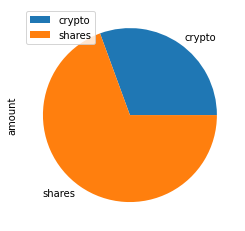

In [13]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount')

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings=df_savings['amount'].sum()

# Validate saving health
# YOUR CODE HERE!
if total_savings>emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund")
elif total_savings==emergency_fund:
    print(f"Congratulations! You have reached your emergency fund amount")
else:
    print(f"You are on the right track! You need to save an additional ${emergency_fund-total_savings:0.2f} to reach your financial goal")

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()
tickers = ["AGG", "SPY"]

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [17]:
# # create function for Montecarlo simulations to make repetitions easier
# def montecarlo(portfolio_data,weight,no_simulations,horizon):
#     MC_sims = MCSimulation(
#         portfolio_data = portfolio_data,
#         weights = weight,
#         num_simulation = no_simulations,
#         num_trading_days = 252*horizon)
# #     input_table=MC_sims.portfolio_data.head()
# #     portfolio_returns= MC_sims.calc_cumulative_return()
# #     return [input_table, portfolio_returns]
#     return MC_sims

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

# input number of simulations you wnat for Montecarlo. 
# Input once for entire code
no_simulations=500

# Assumptions for MC simulations:
# Number of years
horizon=30
# weight = [AGG weight, SPY weight]
weight=[.40,.60]

MC_sims = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weight,
    num_simulation = no_simulations,
    num_trading_days = 252*horizon)

In [19]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_sims.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_sims.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006721,1.000813,0.998389,0.989002,1.001162,0.998733,1.016359,0.999133,1.003279,0.988475,...,1.003695,1.017837,0.990693,0.993338,0.990351,0.997167,0.992743,1.003063,0.987456,0.993911
2,1.009102,1.002573,0.986330,0.982405,0.994595,0.998627,1.022749,0.999912,0.999957,0.991891,...,0.998424,1.020245,0.996196,0.987748,0.980961,0.994023,0.975633,0.990450,0.986680,0.984781
3,1.006203,1.004072,0.997552,0.988397,0.992410,1.000661,1.019988,0.997793,1.008787,0.993166,...,1.007097,1.024514,1.014808,0.989336,0.978226,0.999706,0.979247,0.977303,0.993218,1.001458
4,1.009652,0.997087,0.996694,0.984513,0.991119,0.989711,1.024301,1.006025,1.010592,0.995114,...,1.013984,1.019592,1.002039,0.972250,0.971999,0.990035,0.985764,0.971798,0.984995,1.011476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.977666,13.394293,5.513611,4.288173,11.855982,7.845671,12.492794,6.036024,11.165018,3.935480,...,3.786595,11.215357,9.373584,13.647669,19.788123,13.885627,4.800008,10.329032,16.319063,5.906836
7557,5.012420,13.443740,5.501883,4.277240,11.764226,7.807166,12.610092,5.993877,11.256830,3.930763,...,3.777625,11.342950,9.339532,13.670801,19.867075,13.867133,4.860275,10.368166,16.387021,5.906804
7558,4.965686,13.363598,5.549803,4.271575,11.753338,7.766543,12.736029,5.972420,11.274237,3.887731,...,3.796783,11.280148,9.354642,13.566395,19.655639,14.015144,4.846701,10.434851,16.325963,5.958664
7559,4.982409,13.215402,5.613605,4.313053,11.630150,7.747135,12.784420,5.932921,11.365897,3.914597,...,3.780070,11.348018,9.430248,13.606382,19.584967,14.329351,4.877351,10.431138,16.267688,6.006356


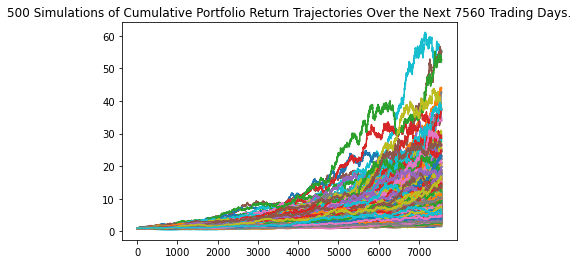

In [21]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot= MC_sims.plot_simulation()

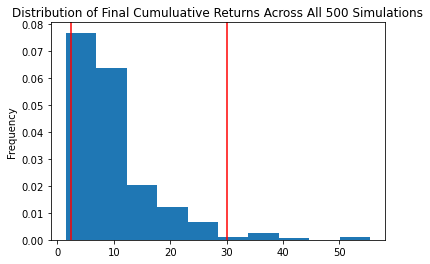

In [22]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot=MC_sims.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl= MC_sims.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             10.028698
std               7.828790
min               1.489877
25%               4.815598
50%               7.828217
75%              11.974621
max              55.485026
95% CI Lower      2.418041
95% CI Upper     30.079033
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $48360.82 and $601580.67


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 *1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $72541.23 and $902371.0


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
# Assumptions for MC simulations:
# Number of years
horizon=5
# weight = [AGG weight, SPY weight]
weight=[.40,.60]

MC_sims = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weight,
    num_simulation = no_simulations,
    num_trading_days = 252*horizon)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_sims.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996866,1.012212,0.994869,1.003287,0.989457,0.998747,1.003405,0.990180,1.003650,0.991176,...,1.003407,0.994385,0.998216,0.994062,1.004828,0.986184,0.996411,1.002787,0.996812,0.997724
2,1.005495,1.007529,0.983206,1.006672,0.980691,1.000439,1.021924,0.986373,0.997255,0.983607,...,1.007580,0.986959,1.010595,0.997158,0.998447,0.983997,0.994419,1.005976,1.006633,0.998231
3,1.003484,1.009767,0.988271,0.995416,0.986699,0.996264,1.031560,0.968796,0.991838,0.977897,...,1.009984,0.988141,1.014701,1.000014,0.997259,0.991912,0.995527,1.006726,1.008684,0.981782
4,0.994518,1.020804,0.984358,0.990019,0.984682,1.001835,1.038472,0.956353,0.993355,0.976131,...,1.010822,0.987673,1.016342,0.994526,0.997858,0.995068,0.991877,1.002297,1.016120,0.977599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.938301,1.283268,1.013784,1.128095,2.396403,1.968225,1.631958,1.296236,1.394444,1.539897,...,1.304883,1.440577,0.929087,1.295508,1.391327,2.349910,1.596335,1.097872,1.526045,1.750176
1257,1.968431,1.280140,1.012536,1.126221,2.418465,1.964231,1.623866,1.302990,1.390024,1.539516,...,1.306452,1.443602,0.933194,1.292203,1.374684,2.371649,1.599741,1.087212,1.534319,1.732033
1258,1.932521,1.277593,1.007960,1.127363,2.453143,1.938591,1.613045,1.303817,1.378570,1.538771,...,1.303329,1.453525,0.923588,1.289602,1.371757,2.391636,1.580603,1.094011,1.520821,1.745582
1259,1.909822,1.279906,1.006823,1.129933,2.438550,1.957176,1.605743,1.298921,1.371857,1.534601,...,1.293099,1.452995,0.914293,1.288023,1.358727,2.380119,1.577303,1.084767,1.508379,1.740489


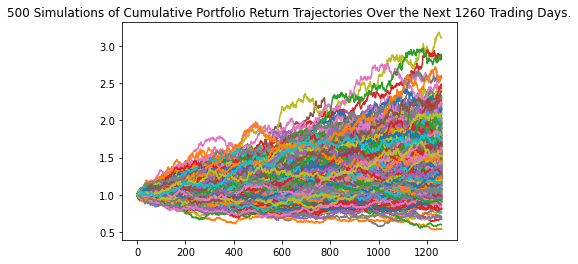

In [28]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_five= MC_sims.plot_simulation()

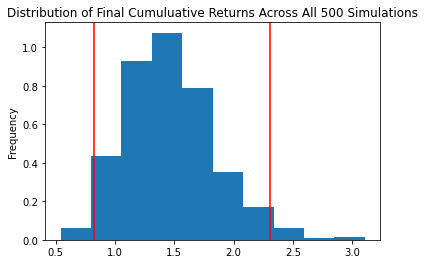

In [29]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_five= MC_sims.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five= MC_sims.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_five)

count           500.000000
mean              1.464414
std               0.381725
min               0.541204
25%               1.214396
50%               1.414405
75%               1.679122
max               3.104936
95% CI Lower      0.820044
95% CI Upper      2.309791
Name: 1260, dtype: float64


In [31]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_five=round(tbl_five[8]*initial_investment,2)
ci_upper_five=round(tbl_five[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $16400.89 and $46195.82


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

# Assumptions for MC simulations:
# Number of years
horizon=10
# weight = [AGG weight, SPY weight]
weight=[.40,.60]

MC_sims = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weight,
    num_simulation = no_simulations,
    num_trading_days = 252*horizon)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_sims.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007458,1.001798,1.000524,1.004848,1.005536,1.000622,0.996740,0.992286,1.001266,1.000947,...,0.991735,1.005831,1.003775,0.999096,0.988640,0.989120,0.995150,0.994564,1.005497,1.005493
2,1.010301,0.994858,1.008720,0.995242,1.004916,0.998587,1.014792,0.994331,1.011132,0.996186,...,0.985770,0.994430,0.994392,0.997096,0.986696,0.978285,1.000409,0.985363,1.016021,1.008797
3,1.005992,0.992686,1.004859,0.987669,1.006364,0.999095,1.016619,0.989472,1.002549,0.992424,...,0.983600,0.990438,0.994455,0.992246,0.980767,0.978901,1.004676,0.986081,1.013923,1.010826
4,1.005302,0.990262,0.998774,0.982656,1.009569,1.013020,1.005446,0.987090,1.002968,1.002437,...,1.002421,0.988256,0.982820,0.987704,0.991483,0.978258,0.996452,0.981925,1.016548,1.012812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.581830,1.173769,2.371270,2.531851,2.090982,2.243307,1.205039,2.302834,1.858021,1.345545,...,1.773287,0.927820,1.628762,0.888152,1.655684,1.871564,4.151977,2.585395,3.577070,1.958052
2517,0.578389,1.175035,2.330093,2.516981,2.097234,2.225101,1.196502,2.304351,1.892358,1.350992,...,1.773649,0.931890,1.619258,0.898446,1.659415,1.877785,4.195151,2.572562,3.615556,1.961632
2518,0.574402,1.177759,2.333412,2.478711,2.104886,2.235399,1.195975,2.268784,1.917544,1.344265,...,1.769720,0.916301,1.635209,0.909222,1.674627,1.857083,4.123955,2.633835,3.612893,1.960786
2519,0.578330,1.186492,2.344767,2.486906,2.085716,2.262585,1.195692,2.273246,1.928670,1.342961,...,1.750457,0.922219,1.649775,0.904715,1.695495,1.870040,4.139869,2.659514,3.619373,1.968907


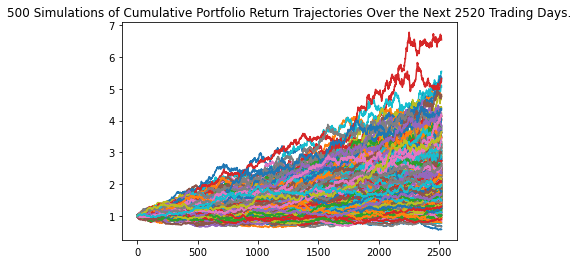

In [34]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_ten=MC_sims.plot_simulation()

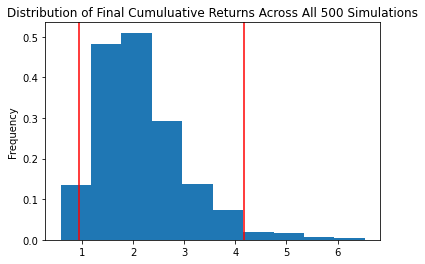

In [35]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_ten=MC_sims.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_ten=MC_sims.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_ten)

count           500.000000
mean              2.149424
std               0.854583
min               0.577389
25%               1.575309
50%               1.977008
75%               2.515448
max               6.534962
95% CI Lower      0.948413
95% CI Upper      4.164045
Name: 2520, dtype: float64


In [37]:
# Set initial investment
# YOUR CODE HERE!
initial_investment=20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten=round(tbl_ten[8]*initial_investment,2)
ci_upper_ten=round(tbl_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $18968.25 and $83280.9
